## Import as bibliotecas

* Importe as bibliotecas necessárias (sklearn, pandas, ...)

In [12]:
import pandas as pd
import seaborn as sns 

## Acessando os dados

* Recupere o **titanic_ready_to_ml.csv**

In [2]:
train = pd.read_csv("titanic_ready_to_ml.csv")

## Construindo do modelo

#### Importe a classe [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) e [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) do Sklearn

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

### Separe os dados em teste e treino

* Importe [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), para facilitar a sepração do treino e do teste, utilize o test_size de 30% e random state igual a 16
* Crie as variáveis X_train, X_test, y_train, y_test a partir do retorno da função da função train_test_split

In [5]:
from sklearn.model_selection import train_test_split
good_data = train.drop(['Survived'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(train.drop(['Survived'], axis=1), 
                                                   train['Survived'], test_size=0.30, 
                                                    random_state=101)

### Instacie um objeto da classe DecisionTreeClassifier()

In [6]:
dtc = DecisionTreeClassifier()

### Treine o modelo chamando a função fit do modelo passando os parametros de treinamento

In [7]:
model = dtc.fit(X_train, y_train)

### Faça as predições, sobre os dados de teste criados anteriormente, invocando a função predict do modelo criado
   * Chame a função *predict_proba* em outra célula. Qual a diferença desse método para o método predict?
   - **Resp.:** O método predict_proba retorna as probabilidades da classificação entre as classes

In [8]:
predictions = model.predict(X_test)

In [9]:
predictions_proba = model.predict_proba(X_test)
predictions_proba

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.

## Avaliando o modelo

### Importe e utilize a função [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) para construir a matriz de confusão, sobre os valores preditos e valores reais.
* *Dica:* Você pode querer visualizar a matriz, veja este [exemplo](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py)
* **Para reflexão:** O que pode haver de comum entre os falsos positivos e os falsos negativos?

In [10]:
cnf_matrix = confusion_matrix(y_test, predictions, labels=[1,0])
cnf_matrix

array([[ 78,  26],
       [ 30, 133]], dtype=int64)

In [16]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de confusão',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[ 78  26]
 [ 30 133]]


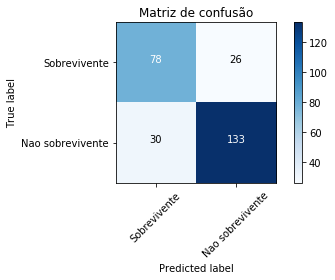

In [17]:
cnf_matrix = confusion_matrix(y_test, predictions, labels=[1,0])
plot_confusion_matrix(cnf_matrix, classes=['Sobrevivente','Nao sobrevivente'],
                      title='Matriz de confusão')

### Importe e utilize a função [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) para visualizar algumas métricas sobre o seu resultado

In [18]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       163
           1       0.72      0.75      0.74       104

    accuracy                           0.79       267
   macro avg       0.78      0.78      0.78       267
weighted avg       0.79      0.79      0.79       267



## Interpretando os resultados do modelo

### Quais as features mais importantes? Visualize o impacto das features na classificação
* *Dica:* Utilize a função feature_importances_ do modelo construído

In [19]:
features = good_data.columns
df_import_features = dict(zip(features, dtc.feature_importances_))
df_import_features = pd.DataFrame.from_dict(df_import_features, orient='index', columns = ['value'])
df_import_features = df_import_features.sort_values(['value'], ascending=False)
df_import_features.head()

,value
Prenome_ Mr,0.301485
Z_Fare,0.176782
Age,0.176618
Class_3,0.069880
Ticket_1_5,0.030456


### Plote em um scatterplot com duas das principais variáveis no eixo x e y e verifique a distinção das classes. <!--Veja este [exemplo](https://medium.com/machine-learning-beyond-deep-learning/%C3%A1rvores-de-decis%C3%A3o-3f52f6420b69)-->

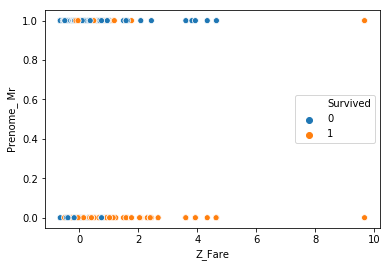

In [27]:
sns.scatterplot(data=train, x='Z_Fare', y='Prenome_ Mr', hue='Survived')

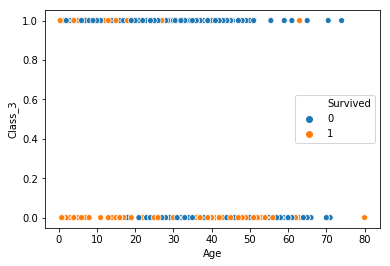

In [28]:
sns.scatterplot(data=train, x='Age', y='Class_3', hue='Survived')

# Tuning Model

### Treine o modelo apenas com as 4 features mais importantes e veja a matriz de confusão
   - Plus: Tente variar algum hiperparamêtro para tentar melhor as KPIs

In [20]:
df_import_features.head(4)

,value
Prenome_ Mr,0.301485
Z_Fare,0.176782
Age,0.176618
Class_3,0.069880


### Você pode alterar a forma como os dados foram tratados e verificar novas formas de pré-processamento e analisar o impacto no modelo

In [33]:
best_columns = ['Prenome_ Mr', 'Z_Fare', 'Age', 'Class_3']
dtc = DecisionTreeClassifier(max_depth=10, min_samples_leaf=10)
model = dtc.fit(X_train[best_columns], y_train)
predictions = model.predict(X_test[best_columns])
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       163
           1       0.83      0.71      0.77       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



#### Analisando a área sob a curva ROC

In [42]:
from sklearn.metrics import roc_auc_score
y_scores = model.predict_proba(X_test[best_columns])
probs = y_scores[:, 1]#Recuperar apenas a primeira linha com as probabilidades de sobreviver classificação = 1
auc = roc_auc_score(y_test, probs)
print(auc)

0.8474221330816423


### Resolva as questoes anteriores, a partir da instanciação do objeto, para o algoritmo [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

### *Challenge:* [Visualize a árvore de decisão](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html)

## <<<<< Aguarde o conteúdo do KNN ;) >>>>>

### Realize as questões anteriores considerando para o algoritmo [KNN Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

### Varie o valor de K (hiperparâmetro) para tentar encontrar a melhor KPI

### Calcule a área da curva [ROC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) para os dois modelos
   - Dica: Você querer [visualizar a área da curva ROC]
   - Dica: Para o cálculo da área da curva roc é necessário passar como parâmetro as probabilidades, ou seja, utilize o método predict_proba() das predições